In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train_cleaned.csv')

In [3]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [4]:
#Segregating variables into dependent and Independent variables

In [5]:
x=data.drop(['Item_Outlet_Sales'], axis=1)

In [9]:
y=data['Item_Outlet_Sales']

In [10]:
x.shape,y.shape

((8523, 45), (8523,))

In [11]:
#Splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=56)

# Implementing Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [15]:
#Creating instance of Linear Regression

In [17]:
lr=LR()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
train_predict=lr.predict(train_x)
k=mae(train_predict, train_y)

In [19]:
print(' Training mean absolute error is   ', k)

 Training mean absolute error is    821.4206146753687


In [20]:
test_predict=lr.predict(test_x)
k=mae(test_predict, test_y)

In [22]:
print(' Testing mean absolute error is   ', k)

 Testing mean absolute error is    875.2688982985251


# Parameters of Linear Regression


In [23]:
#Parameters of LInear Regression
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

In [24]:
#Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

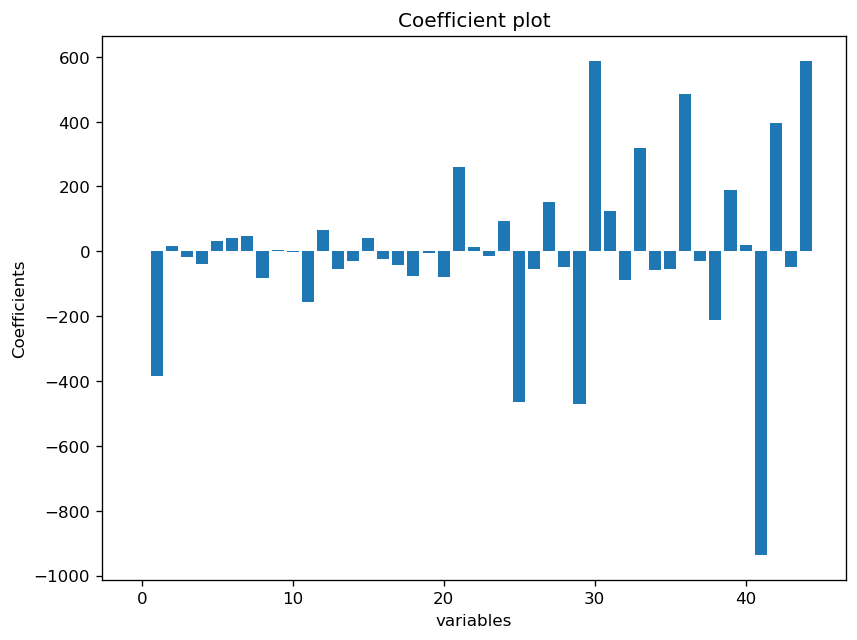

In [27]:
plt.figure(figsize=(8,6), dpi=120, facecolor='w', edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

# Checking assumptions of Linear Models

In [30]:
#calculating residuals=actual-predicted
residuals=pd.DataFrame({'fitted values' : test_y, 'predicted values' : test_predict})
residuals['residuals']=residuals['fitted values']-residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


Plotting Residual Curve

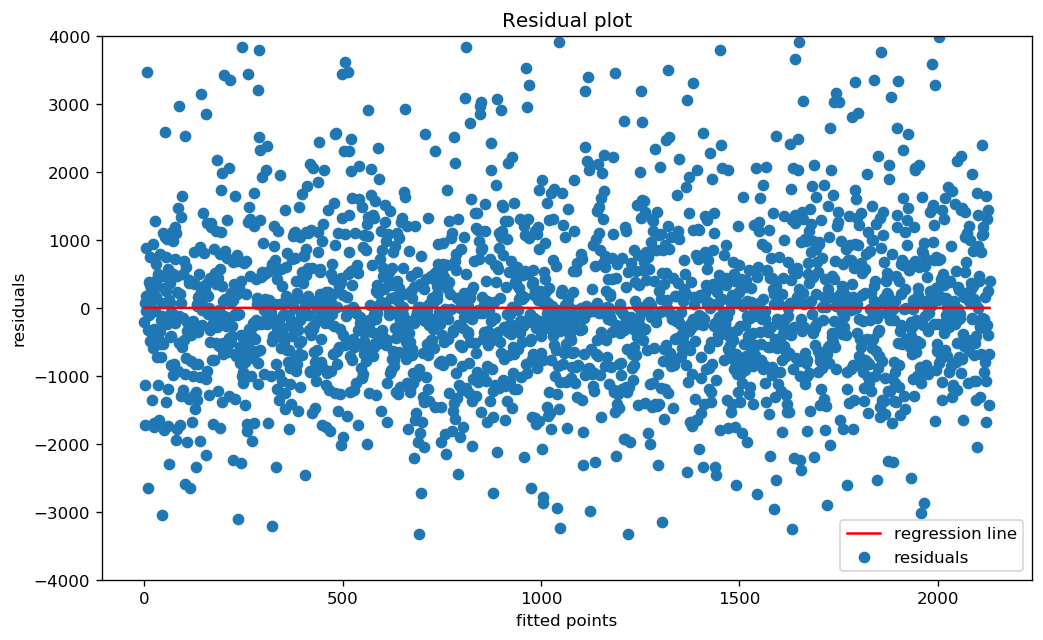

In [33]:
plt.figure(figsize= (10,6), dpi=120, facecolor='w' , edgecolor='b')
f=range(0,2131)
k= [0 for i in  range (0,2131)]

plt.scatter(f, residuals.residuals[:], label='residuals')
plt.plot(f,k,color='red', label='regression line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000,4000)
plt.legend()

# Checking the distribution of Residuals

In [34]:
# Histogram for distribution

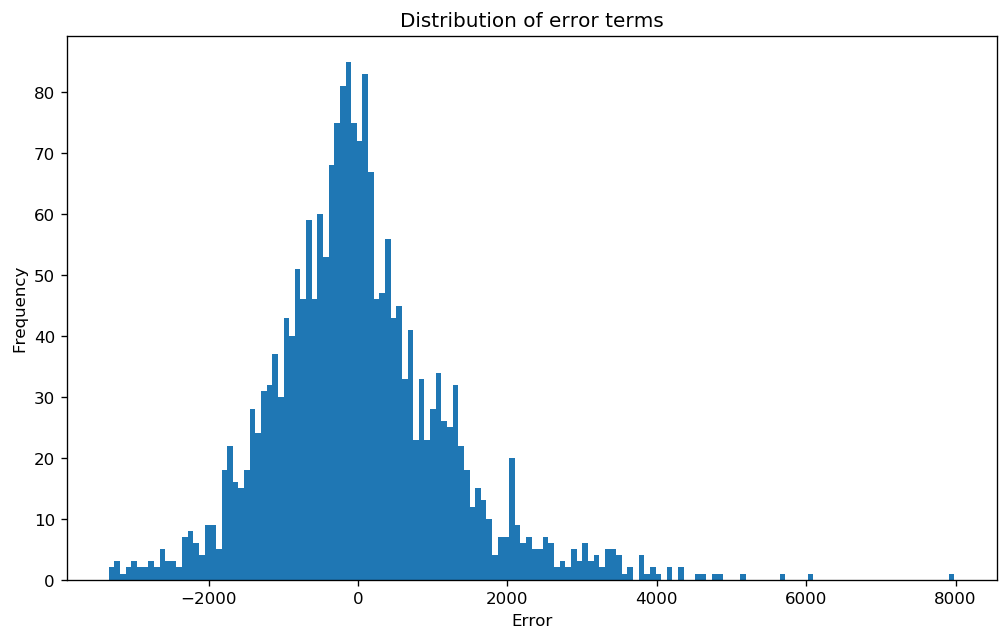

In [36]:
plt.figure(figsize=(10,6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins=150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of error terms')
plt.show()

# QQ-Plot (is the data normally distributed ?)

In [37]:
# importing the qq plot from statamodel

In [39]:
from statsmodels.graphics.gofplots import qqplot

In [40]:
#plotting qq plot

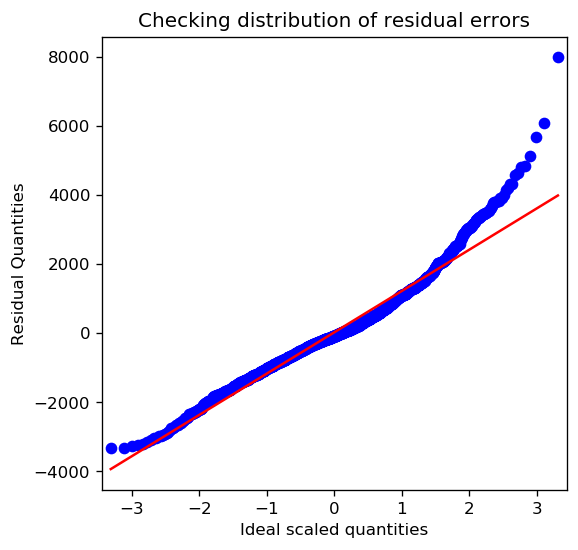

In [41]:
fig,ax=plt.subplots(figsize=(5,5), dpi=120)
qqplot(residuals.residuals, line='s', ax=ax)
plt.ylabel('Residual Quantities')
plt.xlabel('Ideal scaled quantities')
plt.title('Checking distribution of residual errors')
plt.show()

# Variance Inflation Factor

In [42]:
# checking for multi-collinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [44]:
#Calculating VIF for every column (only works for non-categorical)

In [47]:
VIF=pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)

C:\Users\Rita\anaconda3.x\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [48]:
VIF

Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

# Model Interpretability

In [49]:
#normalizing data is important


In [51]:
lr=LR(normalize=True)

In [52]:
#fitting the model


In [53]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [54]:
#Predicting over train, test and calulating error

In [55]:
train_predict=lr.predict(train_x)
k=mae(train_predict, train_y)
print (k)

819.7964175844807


In [56]:
test_predict=lr.predict(test_x)
k=mae(test_predict, test_y)
print(k)

871.6221818864383


Text(0.5, 1.0, 'Normalized Coefficient plot')

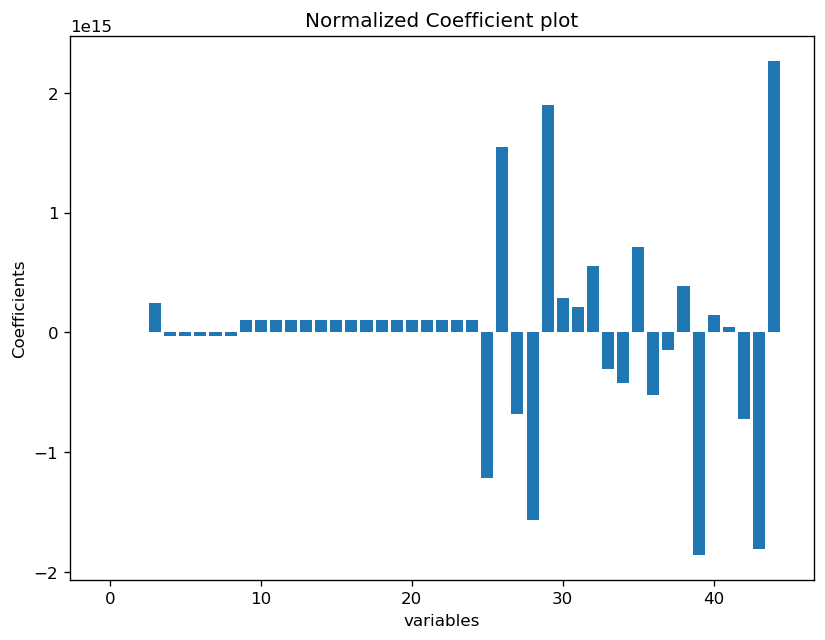

In [57]:
plt.figure(figsize=(8,6), dpi=120, facecolor='w', edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [58]:
#Creating new data subsets

In [59]:
x=data.drop(['Item_Outlet_Sales'], axis=1)
y=data['Item_Outlet_Sales']
x.shape, y.shape
Coefficients=pd.DataFrame({'Variable' : x.columns, 'coefficient' : lr.coef_})
Coefficients.head()

,Variable,coefficient
0,Item_Weight,1.819881e-01
1,Item_Visibility,-3.787202e+02
2,Item_MRP,1.549637e+01
3,Outlet_Establishment_Year,2.468269e+14
4,Item_Fat_Content_LF,-2.606298e+13


In [60]:
sig_var=Coefficients[Coefficients.coefficient>0.5]

In [61]:
subset=data[sig_var['Variable'].values]
subset.head()

,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Size_High,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,249.8092,1999,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,48.2692,2009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,141.6180,1999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,182.0950,1998,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,53.8614,1987,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [62]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=56)
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [64]:
lr=LR(normalize=True)
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)